In [0]:
#memanggil Library yang dibutuhkan
import numpy as np
import pandas as pd
import sklearn
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import StratifiedKFold,train_test_split
import matplotlib.pyplot as plt
import itertools

In [80]:
#melakukan upload dengan library dari google
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (2).csv


In [0]:
#memasukkan data kedalam model

import io
dataset = pd.read_csv('titanic.csv')

In [95]:
# menampilkan 10 data pertama
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data Preprocessing

In [96]:
#memeriksa data NaN/Null

print('Is there any null data?',dataset.isnull().values.any())
print('Null data shown as column:',dataset.isnull().sum())

Is there any null data? True
Null data shown as column: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
#mengisi data age dengan rata-rata umur penumpang
dataset = dataset.fillna(dataset.mean())
#mengisi sisa dataset yang masih kosong
dataset['Cabin'] = dataset.fillna('Unidentified')
dataset['Embarked'] = dataset.fillna('Unidentified')

In [98]:
#menampilkan data null
print('Null data shown as column:',dataset.isnull().sum())

Null data shown as column: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [0]:
#mengubah female - male menjadi binary
#male = 0, female = 1
dataset_copy = dataset.copy()

dataset_copy.loc[dataset['Sex']=='male','Sex'] = 1
dataset_copy.loc[dataset['Sex']=='female','Sex'] = 0


Visualisasi data

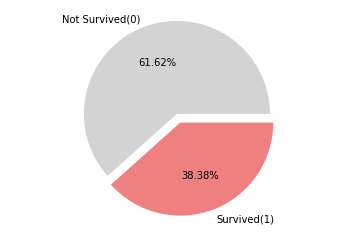

0    549
1    342
Name: Survived, dtype: int64


In [100]:
#visualisasi antar jumlah data penumpang selamat dan tidak selamat

labels = 'Not Survived(0)', 'Survived(1)'
sizes = dataset['Survived'].value_counts()
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#D3D3D3','#f08080']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%.2f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
#melihat jumlah data untuk masing2 label
print(dataset['Survived'].value_counts())

Train + test split

In [0]:
#'split' data, pemisahan data training dan testing dengan rasio 70% data training dan 30% data testing(test size)
X_train, X_test, y_train, y_test = train_test_split(dataset['Fare'], dataset['Survived'],test_size=0.3)
#yang akan digunakan untuk melakukan prediksi adalah keterkaitan harga tiket (Fare) dengan penumpnang selamat

Predict + plotting Confusion matrix

In [0]:
#fungsi Training(prediksi) dan ploting
#fungsi-fungsi yang ada dibawah ini digunakan untuk:
#1. Melakukan training + testing
#2. Menggambar confusion matrix (Plotting)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels,
                                              predicted_labels),
                        2))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels,
                                              predicted_labels,
                                               average='weighted'),
                        2))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels,
                                              predicted_labels,
                                               average='weighted'),
                        2))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels,
                                              predicted_labels,
                                               average='weighted'),
                        2))
    print('CR:', metrics.classification_report(true_labels,
                                                predicted_labels))
    
def train_predict_evaluate_model (classifier, 
                                 train_features, 
                                 train_labels,
                                test_features, 
                                 test_labels):
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features)
    get_metrics(true_labels = test_labels,
               predicted_labels=predictions)
     # Plot non-normalized confusion matrix
    cnf_matrix = metrics.confusion_matrix(test_labels,predictions)
    plt.figure()
    class_names = ['Not Survived', 'Survives']
    plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
    plt.show()
    return predictions

In [0]:
#reshape agar data bisa dibaca
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

Klasifikasi penumpang selamat menggunakan Naive Bayes
Accuracy: 0.64
Precision: 0.41
Recall: 0.64
F1 Score: 0.5
CR:               precision    recall  f1-score   support

           0       0.64      1.00      0.78       172
           1       0.00      0.00      0.00        96

    accuracy                           0.64       268
   macro avg       0.32      0.50      0.39       268
weighted avg       0.41      0.64      0.50       268

Confusion matrix, without normalization
[[172   0]
 [ 96   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


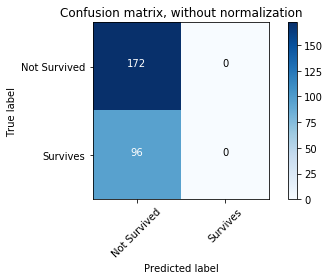

------------------------------------------
Klasifikasi penumpang selamat menggunakan Logistic Regression
Accuracy: 0.67
Precision: 0.65
Recall: 0.67
F1 Score: 0.63
CR:               precision    recall  f1-score   support

           0       0.68      0.90      0.78       172
           1       0.58      0.26      0.36        96

    accuracy                           0.67       268
   macro avg       0.63      0.58      0.57       268
weighted avg       0.65      0.67      0.63       268

Confusion matrix, without normalization
[[154  18]
 [ 71  25]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


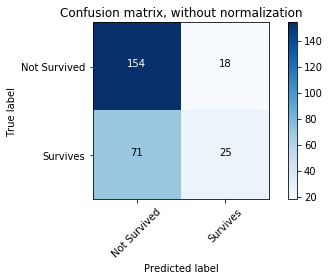

------------------------------------------
Klasifikasi penumpang selamat menggunakan algoritma SVM
Accuracy: 0.7
Precision: 0.69
Recall: 0.7
F1 Score: 0.7
CR:               precision    recall  f1-score   support

           0       0.76      0.78      0.77       172
           1       0.58      0.55      0.57        96

    accuracy                           0.70       268
   macro avg       0.67      0.67      0.67       268
weighted avg       0.69      0.70      0.70       268

Confusion matrix, without normalization
[[134  38]
 [ 43  53]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


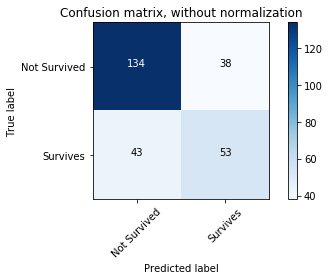

------------------------------------------


In [67]:
#prediksi NAIVE BAYES dan Logistic Regression
mnb = naive_bayes.BernoulliNB()

print('Klasifikasi penumpang selamat menggunakan Naive Bayes')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=X_train,
                                                  train_labels=y_train,
                                                  test_features=X_test,
                                                  test_labels=y_test)
print('------------------------------------------')

print('Klasifikasi penumpang selamat menggunakan Logistic Regression')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.LogisticRegression(),
                                                  train_features=X_train,
                                                  train_labels=y_train,
                                                  test_features=X_test,
                                                  test_labels=y_test)
print('------------------------------------------')

print('Klasifikasi penumpang selamat menggunakan algoritma SVM')
mnb_bow_predictions = train_predict_evaluate_model(classifier=svm.SVC(),
                                                  train_features=X_train,
                                                  train_labels=y_train,
                                                  test_features=X_test,
                                                  test_labels=y_test)
print('------------------------------------------')

